# Estación Retiro

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_49.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,37.129032
2013-02-01,28.709677
2013-03-01,24.096774
2013-04-01,21.290323
2013-05-01,20.096774


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

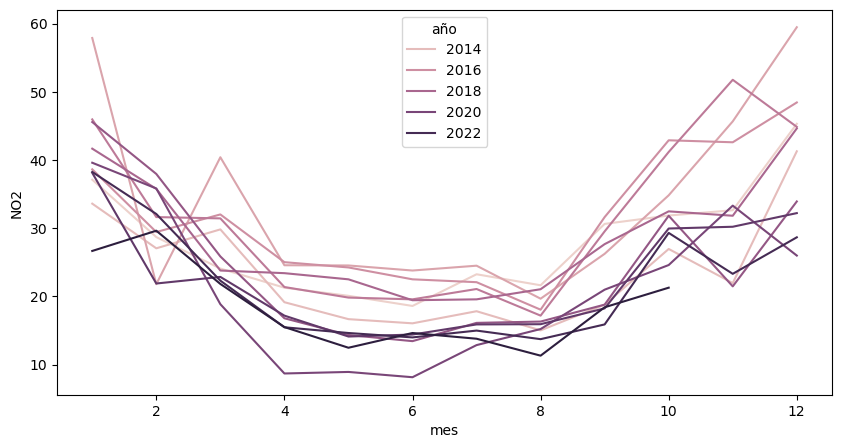

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

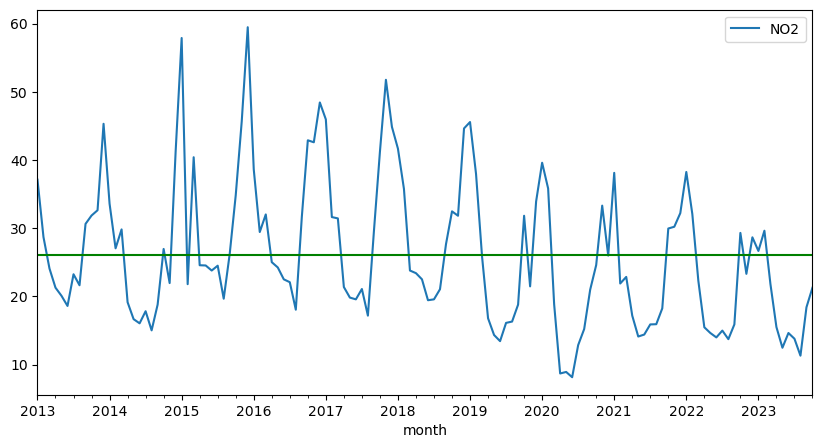

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

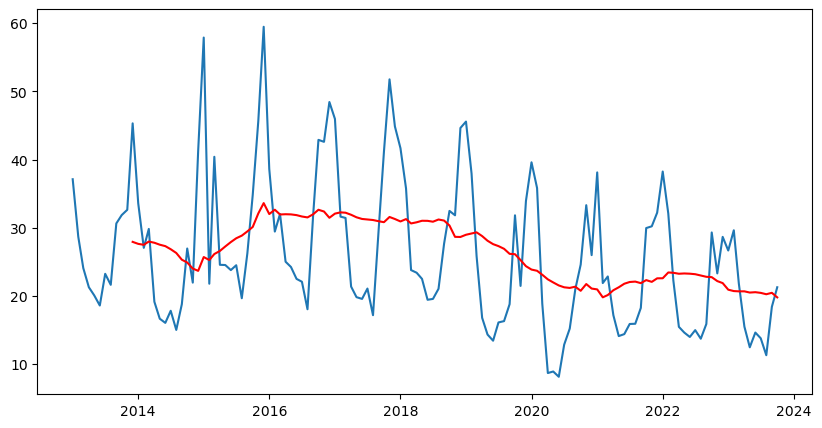

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(-0.361905173359518,
 0.916267590818668,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 756.1485760610292)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.361905173359518
p-value 0.916267590818668
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999998
1 mes Lag, 0.6972804010204743
2 mes Lag, 0.4506597858362134
3 mes Lag, 0.15195823848089532
4 mes Lag, -0.17055054065261122
5 mes Lag, -0.3633431043951206
6 mes Lag, -0.4258887500298804
7 mes Lag, -0.3893195225232521
8 mes Lag, -0.20496053141570114
9 mes Lag, 0.10893647175580241
10 mes Lag, 0.4029416538436626
11 mes Lag, 0.6592492379479272
12 mes Lag, 0.7877152627273473
13 mes Lag, 0.6614508006472158
14 mes Lag, 0.3957120181178628
15 mes Lag, 0.12011676777971554
16 mes Lag, -0.20026780242781464
17 mes Lag, -0.41667741313939183
18 mes Lag, -0.4780350813936415
19 mes Lag, -0.4555414317208197
20 mes Lag, -0.2522388383000204
21 mes Lag, 0.06538658187635113
22 mes Lag, 0.32842081628181513
23 mes Lag, 0.6025140628543021
24 mes Lag, 0.7270292725162396
25 mes Lag, 0.5866623242499158
26 mes Lag, 0.3622564057117102
27 mes Lag, 0.07284772922018895
28 mes Lag, -0.2577388060553362
29 mes Lag, -0.47794508256476975
30 mes Lag, -0.5493882748211311
31 mes Lag, -0.4913849563

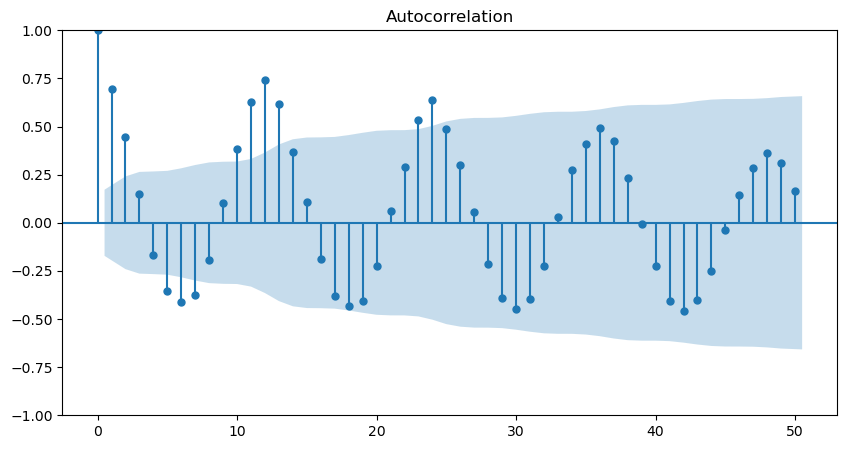

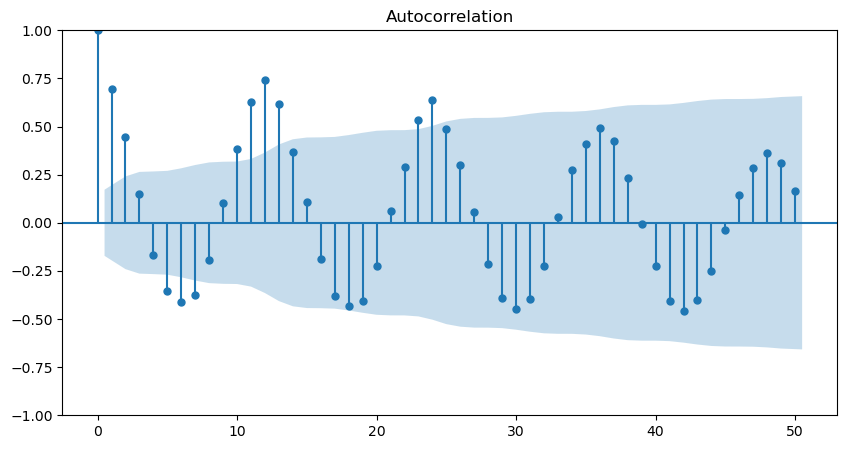

In [14]:
plot_acf(df, lags = 50)

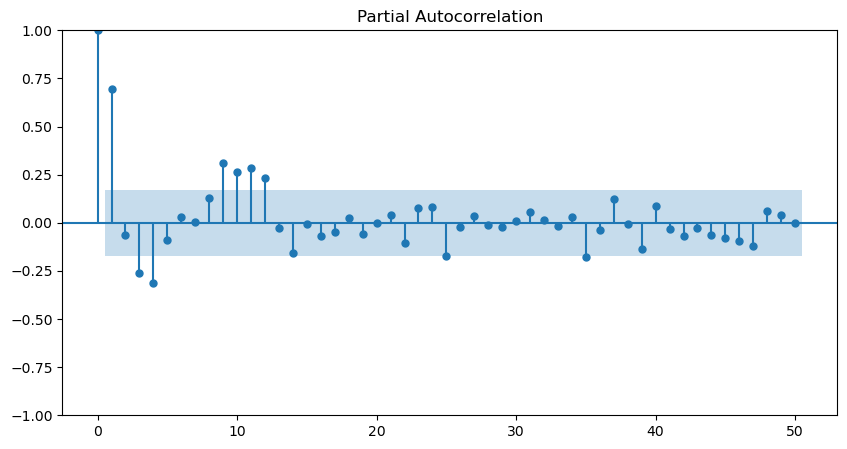

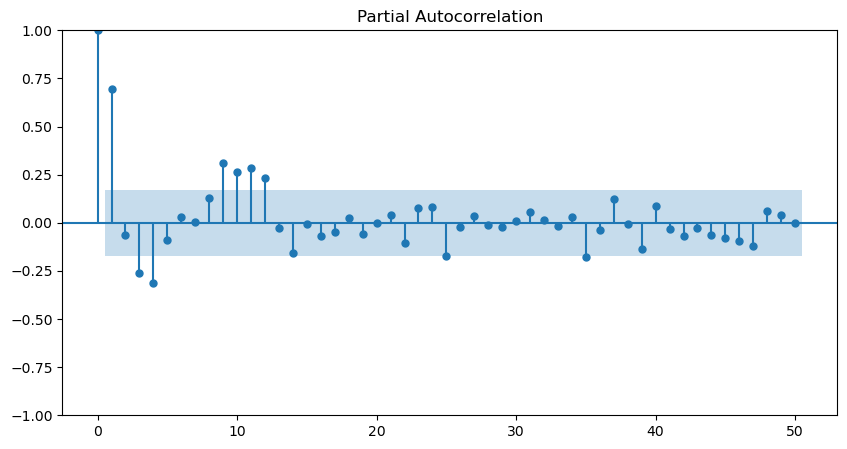

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,37.129032
2013-02-01,28.709677
2013-03-01,24.096774
2013-04-01,21.290323
2013-05-01,20.096774


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 62%|██████▎   | 15/24 [00:00<00:00, 24.96it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 750 ms
Wall time: 1.19 s


In [22]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
7,7.913890,"(1, 1, 1)"
6,7.918663,"(1, 1, 0)"
1,7.925480,"(0, 1, 1)"
12,8.056867,"(2, 1, 0)"
0,8.143357,"(0, 1, 0)"


In [23]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(1, 1, 1, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

Error mae:  5.16436246689872
CPU times: total: 141 ms
Wall time: 212 ms


C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,real,pred,error
2021-05-01,14.129032,16.360102,2.231070
2021-06-01,14.419355,15.250038,0.830683
2021-07-01,15.903226,17.999626,2.096400
2021-08-01,15.935484,17.395209,1.459725
2021-09-01,18.258065,24.497094,6.239030
2021-10-01,29.967742,31.012337,1.044595
2021-11-01,30.225806,34.580286,4.354479
2021-12-01,32.225806,38.525172,6.299366
2022-01-01,38.258065,40.904055,2.645991
2022-02-01,32.096774,27.893956,-4.202818


In [24]:
pred["real_test"] = y_test

In [25]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,34.942492
2023-12-01,42.132654
2024-01-01,41.703312
2024-02-01,29.619402
2024-03-01,27.369919
2024-04-01,19.667912
2024-05-01,18.566970
2024-06-01,17.373160
2024-07-01,19.539089
2024-08-01,18.046648


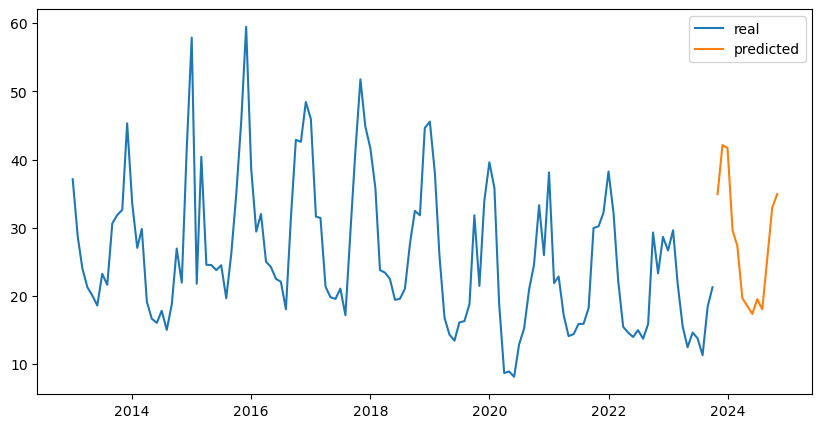

In [26]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [27]:
pred_año.mean()

predicted_mean    27.87734
dtype: float64

In [28]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-11-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-11-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2023-10-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

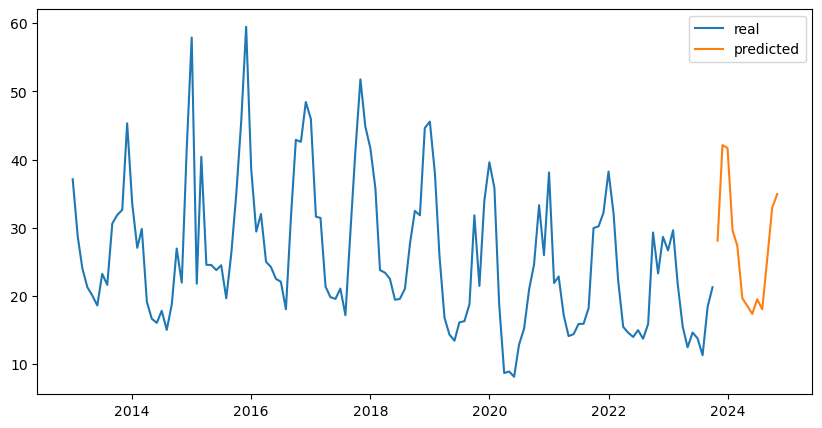

In [29]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [30]:
pred_año.mean()

predicted_mean    27.352256
dtype: float64